In [13]:
from __future__ import division, print_function

# For reloading external modules
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
import numpy as np
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [3]:
nx = 640
ny = 360

In [4]:
generator = image_util.ImageDataProvider(
    images_path='./unit-tests')


Number of files used: 6


In [18]:
net = unet.Unet(channels=3, n_class=3, layers=4, features_root=16, cost_kwargs=dict(class_weights=[1,1,1]))

2017-10-09 11:54:57,806 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [21]:
x_test, y_test, names = generator(6)

prediction = net.predict("./unet_trained/val_8_batch_1/model.cpkt", x_test)




INFO:tensorflow:Restoring parameters from ./unet_trained/val_8_batch_1/model.cpkt


2017-10-09 11:55:45,393 Restoring parameters from ./unet_trained/val_8_batch_1/model.cpkt
2017-10-09 11:55:45,757 Model restored from file: ./unet_trained/val_8_batch_1/model.cpkt


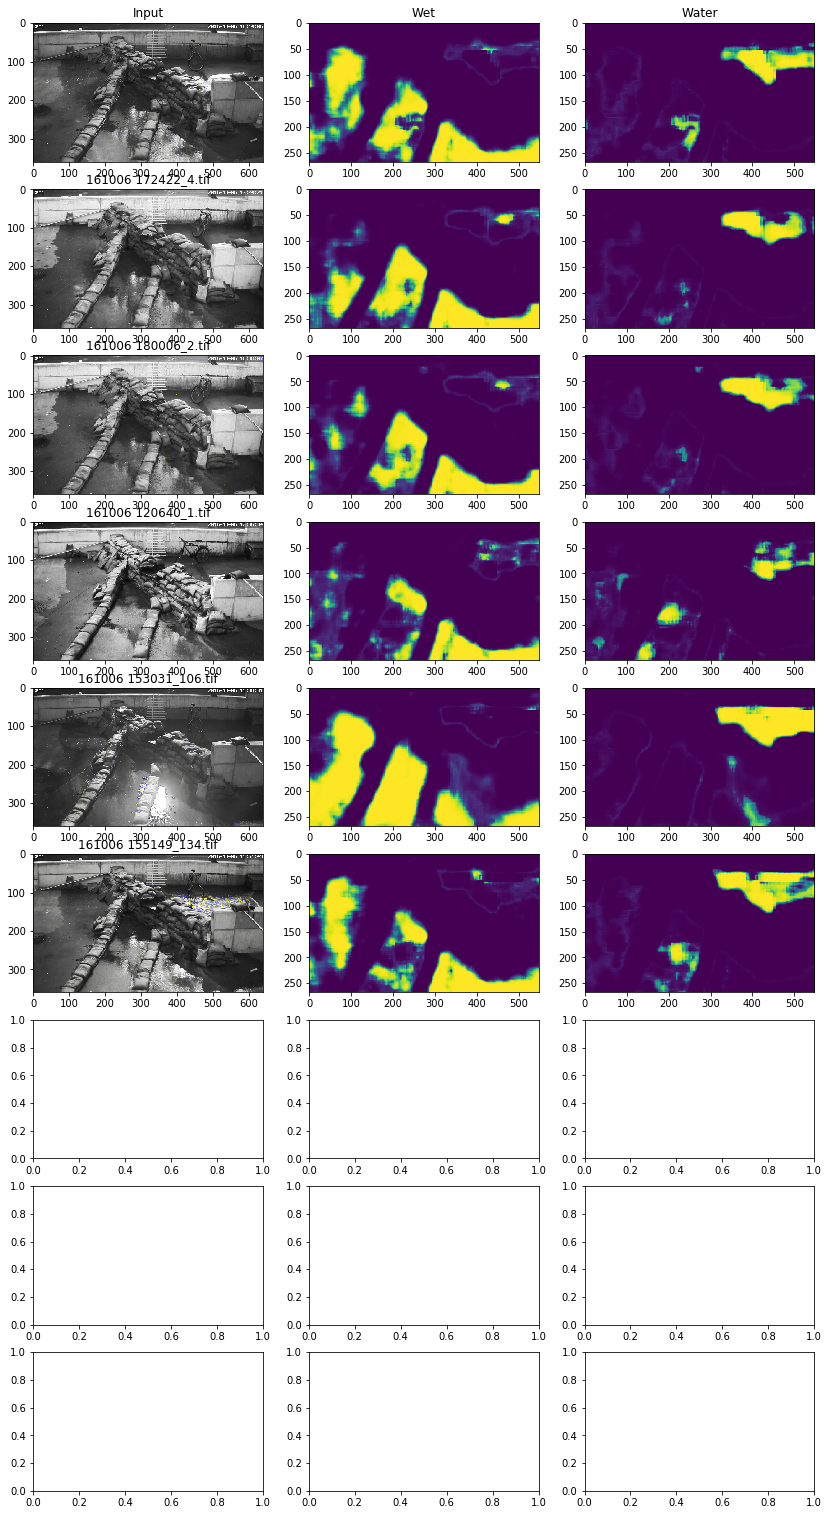

In [22]:
fig, ax = plt.subplots(9, 3, sharex=False, sharey=False, figsize=(14,27))
for i in range(0,6):
    ax[i,0].set_title(os.path.basename(names[i]))
    ax[i, 0].imshow(x_test[i,...], aspect="auto")
    mask = prediction[i,...,1]#>0.8
    ax[i, 2].imshow(mask, aspect="auto")
    
#     ax[i, 3].imshow(y_test[i,...,2], aspect="auto")
    mask = prediction[i,...,2]#>0.8
    ax[i, 1].imshow(mask, aspect="auto")
ax[0,0].set_title("Input")
ax[0,1].set_title("Wet")
ax[0,2].set_title("Water")